<h1><b><Center>All the Questions are mentioned below this just rough work with label as Question no<br><hr><br><br>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
df = pd.read_csv("Titanic-Dataset.csv")
df = df.drop(['PassengerId',"Ticket","Cabin","Name"],axis=1)


In [79]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
x=df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y=df["Survived"]
x["Sex"] = x["Sex"].map({"female": 0, "male": 1})
x["Embarked"] = x["Embarked"].map({"S": 1, "C": 2, "Q": 3})
print(x.dtypes,end="\n\n")
print(x.isnull().sum())

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
x_test=pd.DataFrame([[2,0,26,1,1,26,1]])
prediction= knn.predict(x_test)
print(prediction)

<h1><b><Center>Question 1: Feature Engineering<br><br>

<h3><B>Ans) to use gender and embarked in knn we need to change them into numbers because knn works only with numbers we can do this by mapping like male to 1 and female to 0 same for embarked we can give s as 0 c as 1 and q as 2 this way knn can understand the data and use it for prediction

In [100]:
x["Sex"] = x["Sex"].map({"female": 0, "male": 1})
x["Embarked"] = x["Embarked"].map({"S": 1, "C": 2, "Q": 3})

<hr><br><br><br><br><br><br><br>

<h1><b><Center>Question 2: Model Training and Evaluation<br><hr>

In [90]:
X_train,X_test,Y_train,Y_Test=train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
accuracy=knn.score(X_test,Y_Test)
print(accuracy)

0.7039106145251397


In [96]:
random_seed=[1,10,42,50,55]
acc_list=[]
for seed in random_seed:
    X_train,X_test,Y_train,Y_Test=train_test_split(x,y,test_size=0.2,random_state=seed)
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,Y_train)
    accuracy=knn.score(X_test,Y_Test)
    acc_list.append(accuracy)
    print("With Random_state",seed," We got Accuracy : ",accuracy)

With Random_state 1  We got Accuracy :  0.7486033519553073
With Random_state 10  We got Accuracy :  0.6927374301675978
With Random_state 42  We got Accuracy :  0.7039106145251397
With Random_state 50  We got Accuracy :  0.6815642458100558
With Random_state 55  We got Accuracy :  0.659217877094972


<h1><b><Center>Question 3: Visualization and Interpretation<br><hr><br><br>

With Random_state 1  We got Accuracy :  0.7486033519553073<br>
With Random_state 10  We got Accuracy :  0.6927374301675978<br>
With Random_state 42  We got Accuracy :  0.7039106145251397<br>
With Random_state 50  We got Accuracy :  0.6815642458100558<br>
With Random_state 55  We got Accuracy :  0.659217877094972<br>
<b><h3>We can see that the accuracy changes with different random states. The best accuracy was with random state 1, and the lowest was with 55. This happens because the train-test split changes every time, so the data that the model sees is different. If the split gives a better balance of classes or important examples in training, the model performs better. So accuracy can vary a little depending on the random stat

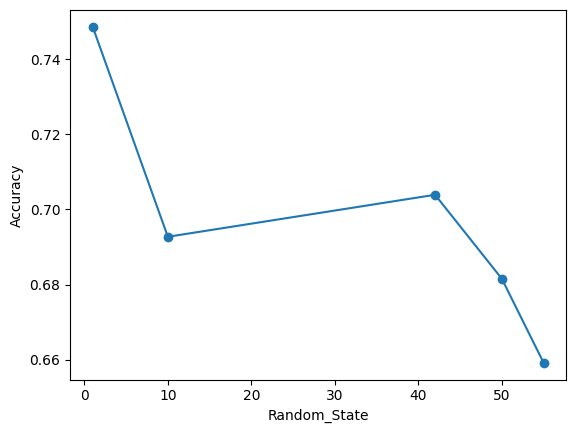

In [99]:
plt.plot(random_seed,acc_list,marker='o')
plt.xlabel("Random_State")
plt.ylabel("Accuracy")
plt.show()

<hr><br><h1><center>THE END